## SVM - 1

### Using sklearn

In [1]:
import numpy as np
from sklearn.datasets import make_blobs

# Make dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2)
y[y == 0] = -1

<AxesSubplot:>

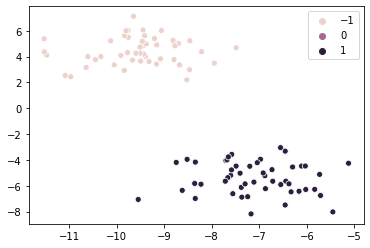

In [2]:
import seaborn as sns

# Plot the data
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [3]:
from sklearn.svm import SVC

# Using SVC to classify the object
model = SVC(kernel="linear").fit(X, y)

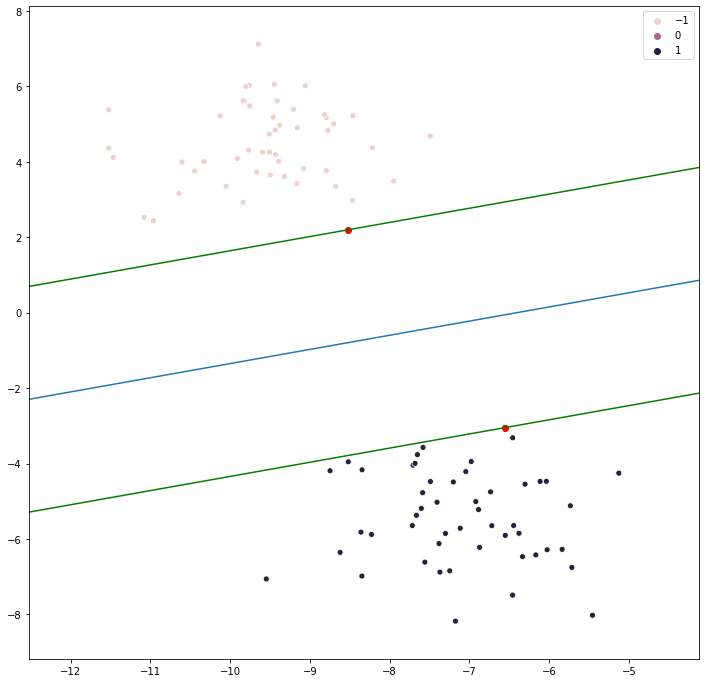

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0] + 1))
plt.ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1] + 1))

# Plot the data
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

# Plot the line
w = model.coef_[0]

# Because w was the weight for each feature
# We should convert it to the slope
a = -w[0] / w[1]

xx = np.linspace(-100, 100, 1200)
yy = a * xx - model.intercept_[0] / w[1]

# Plot the support vector
support_vectors = model.support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')

# Plot the line through support vector
yy_1 = a * xx - (model.intercept_[0] - 1) / w[1]
yy_2 = a * xx - (model.intercept_[0] + 1) / w[1]

plt.plot(xx, yy_1, 'g')
plt.plot(xx, yy_2, 'g')


plt.plot(xx, yy)

## SVM - 2

### Use QP

In [5]:
#Importing with custom names to avoid issues with numpy / sympy matrix
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

#Initializing values and computing H. Note the 1. to force to float type
m, n = X.shape

y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [6]:
#w parameter in vectorized form
w = ((y * alphas).T @ X).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

print('w = ', w.flatten())
print('b = ', b[0])

w =  [ 0.12547403 -0.33417059]
b =  [0.80404619]


In [7]:
# w for optimizer
print(-w[0] / w[1])

# b for optimizer
print(b[0] / w[1])

[0.37547898]
[-2.40609502]


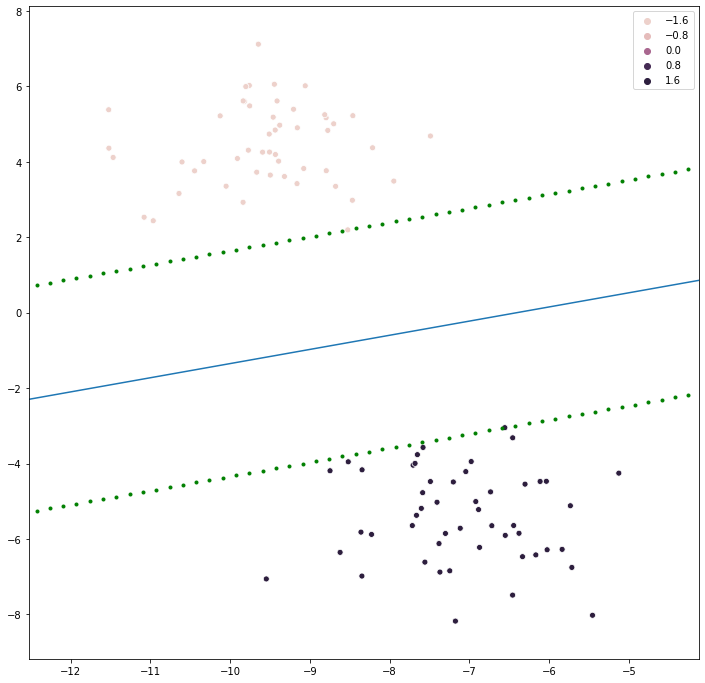

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0] + 1))
plt.ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1] + 1))

# Plot the data
sns.scatterplot(X[:, 0], X[:, 1], hue=y.reshape(-1))

xx = np.linspace(-100, 100, 1200)
tangent = w[0] / w[1]

yy = -xx * tangent - b[0] / w[1]


# Plot the line through support vector
yy_1 = a * xx - (model.intercept_[0] - 1) / w[1]
yy_2 = a * xx - (model.intercept_[0] + 1) / w[1]

plt.plot(xx, yy_1, 'g.')
plt.plot(xx, yy_2, 'g.')


plt.plot(xx, yy)